## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

## Reading the Data

In [2]:
# Connecting the Database
conn = sqlite3.connect('im.db')

In [3]:
# Checking the names of the tables
pd.read_sql("""
            SELECT name 
            FROM sqlite_master 
            WHERE type = 'table'
            """, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# Previewing the movie_basics table to familiarize with the fields

pd.read_sql(
    '''
    SELECT *
    FROM movie_basics;
    '''
    , conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
# Previewing the movie_ratings table
pd.read_sql(
    '''
    SELECT *
    FROM movie_ratings;
    '''
    , conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Joining the two tables to get more info about them 

df = pd.read_sql(
    '''
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
    USING (movie_id)
    '''
    , conn)

print(df.shape)
df.head()

(73856, 8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


## Data Wrangling

In [7]:
# Checking for missing values in the df
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

### Dropping Rows

In [8]:
# Dropping rows in that contain empty genres and checking the shape
df.dropna(subset=['genres'], inplace=True)
df.shape

(73052, 8)

In [9]:
# Checking whether there is any empty genres in the dataframe
df['genres'].isna().sum()

0

### Imputing the runtime_minutes columns

In [10]:
# Checking the max time and min time
df['runtime_minutes'].max(), df['runtime_minutes'].min()

(51420.0, 3.0)

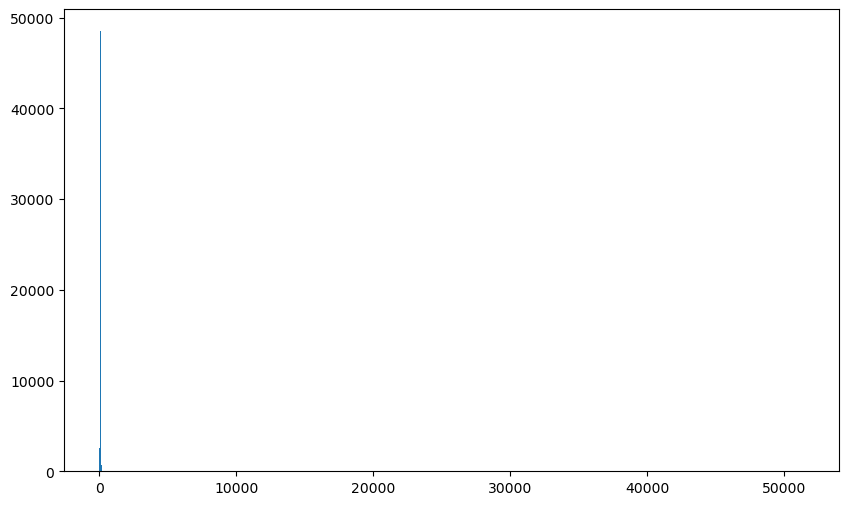

In [11]:
# Plot a histogram to see if the data is positive or negatively skewed
fig, ax = plt.subplots(figsize=(10,6))

# Creating the histogram
x = df['runtime_minutes']
ax.hist(x, bins=1000)
plt.show()

As seen by the histogram the data is positively skewed and has a maximum time of 51420 minutes and mininum time of 3 minutes. Because the data is positively skewed it is optimale to median in this because of the large outlier of the maximum time which will greatly affect the mean of the data

In [12]:
# Choose median to fill to missing values because of the outliers in data would greatly affect the mean 
df['runtime_minutes'].fillna(df['runtime_minutes'].median(), inplace=True)

In [13]:
# Checking of all the changes have been made
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### Checking for duplicates

In [14]:
duplicates = df.duplicated()

# Checking if there are any duplicates
if duplicates.any():
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


## Exploratory Data Analysis

### Breaking down the Genres Column

In [15]:
# Split the genres into individual columns
df['Genres'] = df['genres'].str.split(',')
# By applying the explode() method to the 'Genres' column, each element within the lists is expanded, resulting in individual rows for each value.
df = df.explode('Genres')

In [16]:
# Checking the changes done to the dataframe
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama


In [17]:
# Check the Genres in the dataframe using a frequency table
df['Genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: Genres, dtype: int64